In [1]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

import dmba

%matplotlib inline

no display found. Using non-interactive Agg backend


In [2]:
#Load the Universal Bank Data

universal_bank_df = pd.read_csv("UniversalBank.csv")

# Change the column Names
universal_bank_df.columns = [col.replace(' ', '_') for col in universal_bank_df.columns]

In [3]:
universal_bank_df.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
col_list = ['Education', 'Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard']

for col in col_list:
    print(col, "unique values",universal_bank_df[col].unique())

Education unique values [1 2 3]
Personal_Loan unique values [0 1]
Securities_Account unique values [1 0]
CD_Account unique values [0 1]
Online unique values [0 1]
CreditCard unique values [0 1]


In [5]:
# Make above columns as categorical
universal_bank_df[col_list] = universal_bank_df[col_list].astype('category')
universal_bank_df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP_Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object

In [6]:
# Now split the data into training data and validation data 

#Partition the data into train and valid. Make sure you set seed
trainData = universal_bank_df.sample(frac=0.9, random_state=1)
validData = universal_bank_df.drop(trainData.index)


print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (4500, 14)
Validation :  (500, 14)


In [7]:
validData.head()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
14,15,67,41,112,91741,1,2.0,1,0,0,1,0,0,0
15,16,60,30,22,95054,1,1.5,3,0,0,0,0,1,1
20,21,56,31,25,94015,4,0.9,2,111,0,0,0,1,0
42,43,32,7,132,90019,4,1.1,2,412,1,0,0,1,0
52,53,30,6,72,94005,1,0.1,1,207,0,0,0,0,0


    ID  Age  Experience  Income  ZIP_Code  Family  CCAvg Education  Mortgage  \
9   10   34           9     180     93023       1    8.9         3         0   
16  17   38          14     130     95010       4    4.7         3       134   
18  19   46          21     193     91604       2    8.1         3         0   
29  30   38          13     119     94104       1    3.3         2         0   
38  39   42          18     141     94114       3    5.0         3         0   

   Personal_Loan Securities_Account CD_Account Online CreditCard  
9              1                  0          0      0          0  
16             1                  0          0      0          0  
18             1                  0          0      0          0  
29             1                  0          1      1          1  
38             1                  1          1      1          0  
   ID  Age  Experience  Income  ZIP_Code  Family  CCAvg Education  Mortgage  \
0   1   25           1      49     911

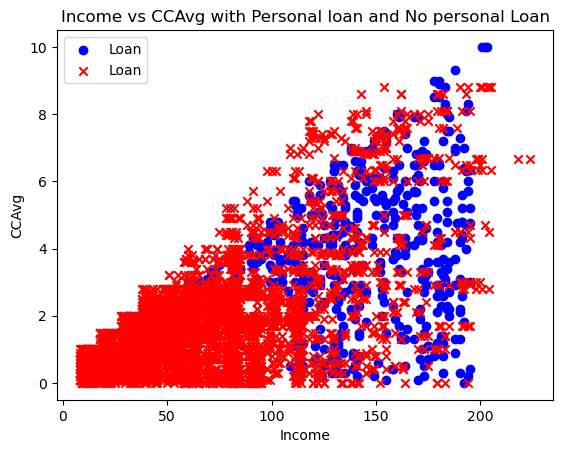

In [8]:
# Draw a scatter plot 

loan_df = universal_bank_df[universal_bank_df['Personal_Loan'] == 1]
non_loan_df = universal_bank_df.drop(loan_df.index)
print(loan_df.head())
print(non_loan_df.head())

plt.scatter(loan_df['Income'], loan_df['CCAvg'], label='Loan', color='blue')
plt.scatter(non_loan_df['Income'], non_loan_df['CCAvg'], label='Loan', color='red', marker='x')
# Add labels and legend
plt.xlabel("Income")
plt.ylabel("CCAvg")
plt.legend()
plt.title("Income vs CCAvg with Personal loan and No personal Loan")
plt.show()




# Observation 

Personal loan is mostly given to people who have higher income . After a income threshold income the CC Avg does not really matter and these can avail teh personal loan mostly.It seems that income in the range of 90-130 requires a better CC avg to be eligible for personal loan.

Though it cannot be conclusive, however this is a good observation. 

In [9]:
# Scale the data to the normal raneg of 0-1

trainData.columns

trainData.dtypes


ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIP_Code                 int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object

In [10]:
X_collist = ['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg','Education', 'Mortgage',
            'Personal_Loan', 'Securities_Account','CD_Account', 'Online', 'CreditCard']
le = LabelEncoder()
universal_bank_df['zZip_Code'] = le.fit_transform(universal_bank_df['ZIP_Code'])
universal_bank_df.head()
universal_bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'zZip_Code'],
      dtype='object')

In [11]:
scaler = preprocessing.StandardScaler()
col_list_norm = ['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 
                 'Mortgage', 'Securities_Account','CD_Account', 'Online', 
                 'CreditCard', 'zZip_Code']
z_col_list = ['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg','zEducation', 'zMortgage', 
              'zSecurities_Account','zCD_Account', 'zOnline', 'zCreditCard', 'zzZip_Code']
scaler.fit(universal_bank_df[col_list_norm])
# Transform the full dataset
norm_full_data = pd.concat([pd.DataFrame(scaler.transform(universal_bank_df[col_list_norm]), 
                                    columns=z_col_list),
                       universal_bank_df['Personal_Loan']], axis=1)

trainNorm = norm_full_data.iloc[trainData.index]
#Similarly, get the valid one as well
validNorm = norm_full_data.iloc[validData.index]
trainNorm.head()
new_data['Age', 'Experience', 'Income', 'Family', 'CCAvg','Education', 'Mortgage', 
         'Securities_Account','CD_Account', 'Online', 
         'CreditCard', 'zZip_Code'] = [15,67,41,112,91741,1,2.0,1,0,1,0,0,0]
newNorm = pd.DataFrame(scaler.transform(new_data[col]), 
                                    columns=['zIncome', 'zLot_Size'])

,zAge,zExperience,zIncome,zFamily,zCCAvg,zEducation,zMortgage,zSecurities_Account,zCD_Account,zOnline,zCreditCard,zzZip_Code,Personal_Loan
2764,-1.250949,-1.317246,0.222159,-1.216855,0.550541,1.332484,0.476888,-0.341423,-0.25354,-1.216618,1.549632,-1.113321,0
4767,-0.901970,-0.968413,-0.625130,0.525991,-0.593961,-1.049078,0.437558,2.928915,-0.25354,-1.216618,-0.645314,-1.350256,0
3814,-0.989215,-0.968413,-0.842384,0.525991,-0.365061,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,0.575794,0
3499,0.319455,0.252503,0.873921,-1.216855,-0.937312,-1.049078,2.256568,-0.341423,-0.25354,0.821951,-0.645314,0.721012,0
2735,-0.814726,-0.706788,-0.081996,0.525991,0.378866,0.141703,1.066837,-0.341423,-0.25354,0.821951,-0.645314,-0.555378,0


In [12]:
validNorm.head()

,zAge,zExperience,zIncome,zFamily,zCCAvg,zEducation,zMortgage,zSecurities_Account,zCD_Account,zOnline,zCreditCard,zzZip_Code,Personal_Loan
14,1.889859,1.822251,0.830470,-1.216855,0.035515,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,-0.937531,0
15,1.279146,0.862960,-1.124814,-1.216855,-0.250611,1.332484,-0.555524,-0.341423,-0.25354,0.821951,1.549632,1.202525,0
20,0.930168,0.950169,-1.059638,1.397414,-0.593961,0.141703,0.535883,-0.341423,-0.25354,0.821951,-0.645314,0.254786,0
42,-1.163704,-1.142829,1.264977,1.397414,-0.479511,0.141703,3.495462,-0.341423,-0.25354,0.821951,-0.645314,-1.778267,1
52,-1.338194,-1.230037,-0.038545,-1.216855,-1.051762,-1.049078,1.479802,-0.341423,-0.25354,-1.216618,-0.645314,0.239500,0


In [13]:
train_X = trainNorm[z_col_list]
train_y = trainNorm['Personal_Loan']
valid_X = validNorm[z_col_list]
valid_y = validNorm['Personal_Loan']

knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[['zIncome', 'zLot_Size']], trainNorm['Ownership'])

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1     0.966
1    2     0.962
2    3     0.968
3    4     0.958
4    5     0.968
5    6     0.962
6    7     0.964
7    8     0.966
8    9     0.968
9   10     0.964
10  11     0.962
11  12     0.960
12  13     0.962
13  14     0.956


In [14]:
knn.kneighbors(validNorm[z_col_list])
knn.predict(validNorm[z_col_list])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,